EJEMPLO: DBSCAN Clustering

In [2]:
import numpy as np
import pandas as pd
from pickle import dump, load
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')

In [4]:
# Ver los nombres de las columnas
print("Nombres de las columnas:")
print(X_train.columns)

Nombres de las columnas:
Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'PM', 'pmRA', 'pmDE',
       'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor',
       'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor',
       'NAL', 'NgAL', 'Nper', 'MatchObs', 'o_Gmag', 'e_FG', 'o_BPmag', 'e_FBP',
       'o_RPmag', 'e_FRP', 'NBPblend', 'NRPblend', 'BP-RP', 'BP-G', 'G-RP',
       'PSS', 'angDist', 'B-R', 'Dist'],
      dtype='object')


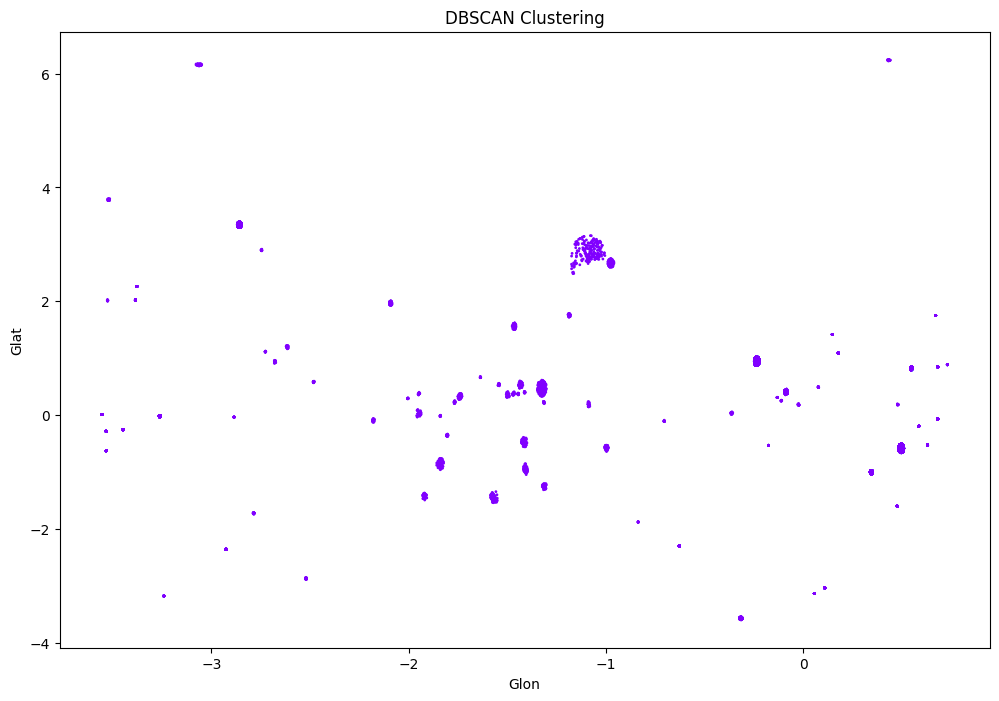

In [5]:
# Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Crear y ajustar el modelo DBSCAN
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X_train_array)

# Obtener los labels de los clústeres
labels = model.labels_

# Paso 4: Visualizar los resultados (selecciona dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o', s=1)
plt.title('DBSCAN Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

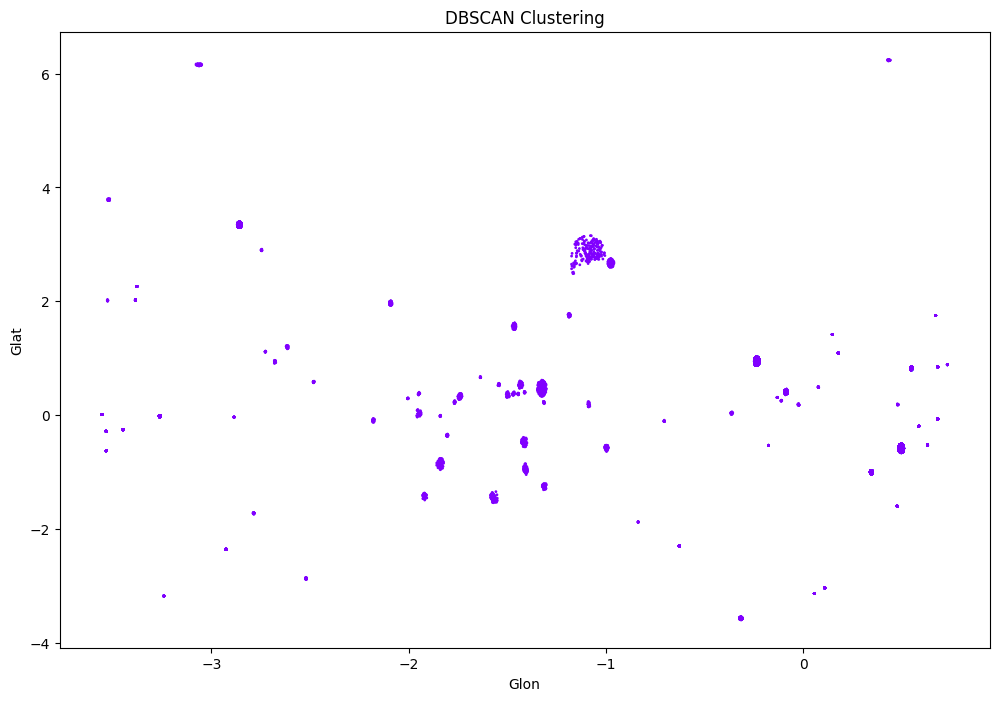

In [6]:
# Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Crear y ajustar el modelo DBSCAN

model = DBSCAN(eps=0.01, min_samples=5)
model.fit(X_train_array)

# Obtener los labels de los clústeres
labels = model.labels_

# Paso 4: Visualizar los resultados (selecciona dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o', s=1)
plt.title('DBSCAN Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

Voy a modificar también el min_samples a ver si influye en algo.

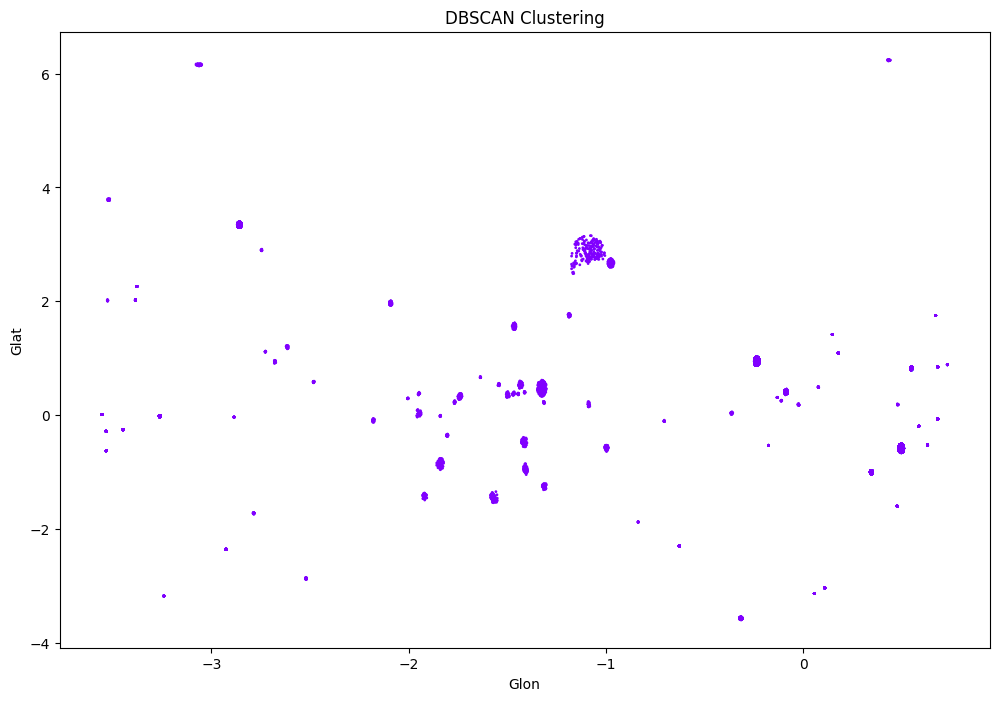

In [7]:
# Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Crear y ajustar el modelo OPTICS

model = DBSCAN(eps=0.01, min_samples=10)
model.fit(X_train_array)

# Obtener los labels de los clústeres
labels = model.labels_

# Paso 4: Visualizar los resultados (selecciona dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o', s=1)
plt.title('DBSCAN Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

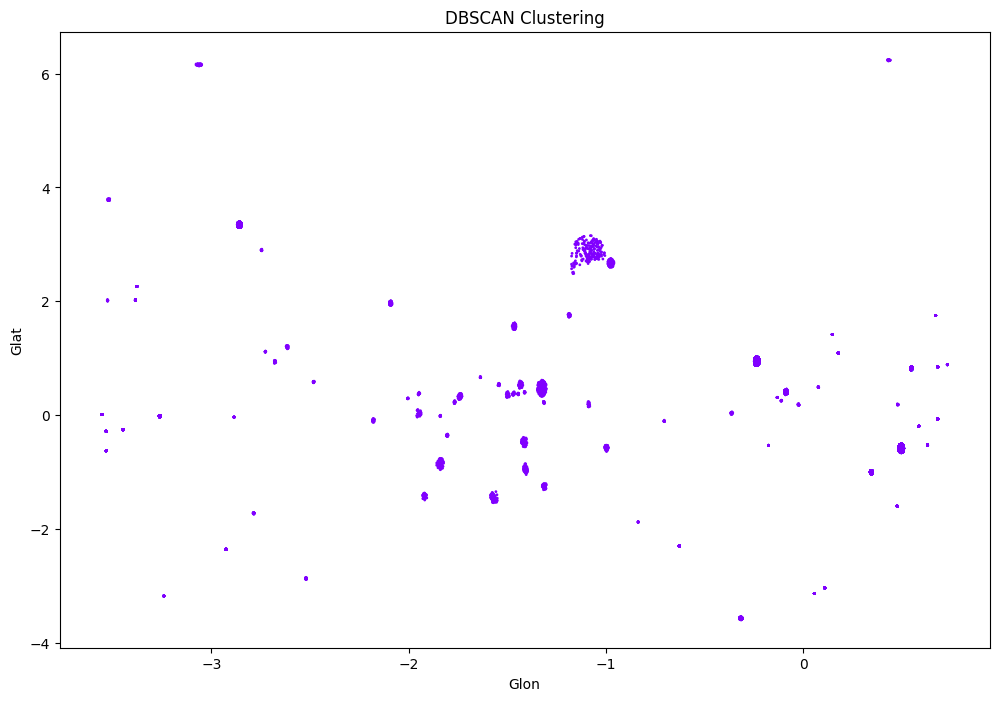

In [8]:
# Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()

#Crear y ajustar el modelo DBSCAN
model = DBSCAN(eps=0.001, min_samples=5)
model.fit(X_train_array)

# Obtener los labels de los clústeres
labels = model.labels_

# Paso 4: Visualizar los resultados (selecciona dos características para plotear)
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=labels, cmap='rainbow', marker='o', s=1)
plt.title('DBSCAN Clustering')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.show()

In [9]:
dump(model, open("../Models/DBSCANt.pkl", "wb"))

He probado varios valores de "eps": desde 0.5 a 0.001. --> Si todos los puntos están siendo coloreados con el mismo color en tu gráfico de dispersión, es posible que necesites ajustar el parámetro eps en tu modelo DBSCAN. El parámetro eps controla la distancia máxima entre dos muestras para que se consideren en el mismo vecindario. Si eps es demasiado grande, todos los puntos pueden considerarse parte del mismo clúster, lo que resulta en un único color para todos los puntos.

Vamos a probar con el método "plot distances". El eje x representa el índice de los puntos ordenados y el eje y representa la distancia promedio de cada punto a los demás puntos en el conjunto de datos. Hay que buscar un punto en el gráfico donde la pendiente cambie significativamente porque este cambio en la pendiente puede indicar un valor razonable para eps.

In [12]:
from sklearn.metrics import pairwise_distances

# Calcular las distancias entre los puntos
distances = pairwise_distances(X_train_array)

# Obtener la distancia promedio por punto
avg_distances = np.mean(distances, axis=1)

# Ordenar las distancias de forma ascendente
sorted_distances = np.sort(avg_distances)

# Graficar las distancias ordenadas
plt.plot(sorted_distances)
plt.xlabel('Índice del punto')
plt.ylabel('Distancia promedio')
plt.title('Distancias promedio ordenadas')
plt.show()

MemoryError: Unable to allocate 2.39 TiB for an array with shape (573424, 573424) and data type float64

El conjunto de datos es demasiado grande para la memoria disponible, de modo que no podemos correr este modelo y obtener resultados con el dataset completo. 